# Statystyka opisowa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

## Statystyki próbkowe i metody opisu danych jakościowych

## Zadanie - podstawowe statystyki
Zaimplementować klase `Stats`, która posiada metody do wyznaczenia:

a) średniej arytmetycznej,
b) mediany,
c) wariancji,
d) odchylenia standardowego


dla dowolnej danych $X$.

In [ ]:
?np.var
# ddof -> 1 / (N - ddof) -> ddof = 1

In [6]:
class Stats:

    def __init__(self, vec):
        self.vec = vec

    def mean(self):
        return np.mean(self.vec)

    def median(self):
        return np.median(self.vec)

    def var(self):
        return np.var(self.vec, ddof=1)

    def std(self):
        return np.std(self.vec, ddof=1)

In [ ]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

stats = Stats(a)

In [ ]:
print(stats.mean())
print(stats.median())
print(stats.var())
print(stats.std())

5.5
5.5
9.166666666666666
3.0276503540974917


## Zadanie - boxplot, szereg rozdzielczy, histogram
Firma budowlana zainteresowana jest jakością betonu. Jedną z pożądanych cech jest jego odpowiednia wytrzymałość na ściskanie. Aby sprawdzić, czy beton proponowany przez dostawcę spełnia normy jakości, przebadano 50 próbek i otrzymano następujące wyniki wytrzymałości na ściskanie:
6.2, 16.7, 25.5, 17.5, 14.4, 27.7, 13.2, 21.2, 21.7, 12.1, 11.7, 27.6, 22.3, 22.8, 14.2, 19.1, 22.7, 16.7, 25.2, 24.9, 13.6,  9.7, 18. , 17.9, 26.3, 17.7, 13.9, 17.7, 22.7, 16.7, 18.8, 19.5, 21.7, 21.5, 19. , 14.6, 24.6, 20.9, 20.7, 21. , 18.4, 15.3, 22.1, 26. ,25.4, 14.1, 18.1, 23. , 14.9, 27.3.

a) Obliczyć podstawowe statystyki próbkowe

b) Sporządzić i opisać wykres skrzynkowy.

c) ***Zbudować szereg rozdzielczy.

d) Narysować histogram liczności.

e) Narysować histogram skumulowanych liczności.

In [ ]:
beton = np.array([6.2, 16.7, 25.5, 17.5, 14.4, 27.7, 13.2, 21.2, 21.7,
                   12.1, 11.7, 27.6, 22.3, 22.8, 14.2, 19.1, 22.7, 16.7,
                   25.2, 24.9, 13.6,  9.7, 18. , 17.9, 26.3, 17.7, 13.9,
                   17.7, 22.7, 16.7, 18.8, 19.5, 21.7, 21.5, 19. , 14.6,
                   24.6, 20.9, 20.7, 21. , 18.4, 15.3, 22.1, 26. ,25.4,
                   14.1, 18.1, 23. , 14.9, 27.3])

In [ ]:
#a
st = Stats(beton)
print(f"Mean: {st.mean()}")
print(f"Median: {st.median()}")
print(f"Variance: {st.var()}")
print(f"Standard deviation: {st.std()}")

print(f"Count: {len(beton)}")
print(f"Min: {beton.min()}")
print(f"Max: {beton.max()}")
print(f"Range: {beton.max() - beton.min()}")
print(f"Q1: {np.quantile(beton, .25)}")
print(f"Q2: {np.quantile(beton, .5)}")
print(f"Q3: {np.quantile(beton, .75)}")
print(f"IQR: {np.quantile(beton, .75) - np.quantile(beton, .25)}")

Mean: 19.29
Median: 19.05
Variance: 24.535204081632656
Standard deviation: 4.953302341027919
Count: 50
Min: 6.2
Max: 27.7
Range: 21.5
Q1: 15.65
Q2: 19.05
Q3: 22.7
IQR: 7.049999999999999


In [ ]:
stat = pd.DataFrame(beton).describe()
stat

,0
count,50.000000
mean,19.290000
std,4.953302
min,6.200000
25%,15.650000
50%,19.050000
75%,22.700000
max,27.700000


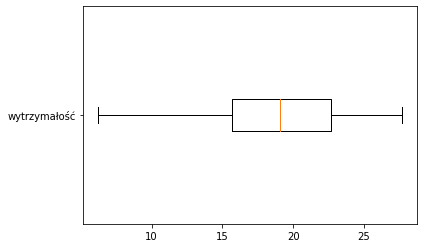

In [ ]:
# b)
plt.boxplot(beton, vert=False, meanline=True, labels=["wytrzymałość"])
plt.show()

(0.0, 30.0)

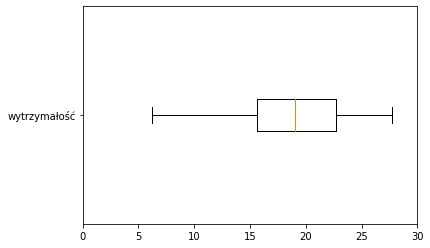

In [ ]:
plt.boxplot(beton, vert=False, meanline=True, labels=["wytrzymałość"])
plt.xlim(0, 30)

In [ ]:
print(beton.min())
print(beton.max())

6.2
27.7


In [ ]:
q1 = np.quantile(beton, .25)
q3 = np.quantile(beton, .75)
iqr = q3 - q1

print(q1 - 3 / 2 * iqr, q3 + 3 / 2 * iqr)

5.075000000000001 33.275


In [ ]:
# c)
n = beton.size

# wyznaczamy liczbę klas
left_k = 0.75 * np.sqrt(n)
right_k = np.sqrt(n)
print(left_k, right_k) # => k = 6

5.303300858899107 7.0710678118654755


In [ ]:
k = 6

# wyznaczamy długośc klasy
bmin = beton.min()
bmax = beton.max()

d = np.round((bmax - bmin) / k, 2)
print(d)

3.58


In [ ]:
# wyznaczamy przedzialy klas
left_bound = np.round(np.arange(bmin, bmax, d)[:k], 2)

intervals = []
n_size = np.zeros(k)

# wyznaczamy szereg rozdzielczy
make_interval = lambda x, y: "[{}, {})".format(x, y)
make_closed_interval = lambda x, y: "[{}, {}]".format(x, y)

for i in range(k-1):
    l, r = left_bound[i], left_bound[i+1]
    intervals.append(make_interval(l, r))
    n_size[i] = np.sum((beton >= l) & (beton < r))

l, r = left_bound[k-1], bmax
intervals.append(make_closed_interval(l, r))
n_size[k-1] = np.sum((beton >= l) & (beton <= r))

f = n_size / beton.size
frequency_distribution = pd.DataFrame({'Interval': np.array(intervals),
                                       'n': n_size, 'f': f,
                                      'cn': np.cumsum(n_size), 'cf': np.cumsum(f)})
frequency_distribution

,Interval,n,f,cn,cf
0,"[6.2, 9.78)",2.0,0.04,2.0,0.04
1,"[9.78, 13.36)",3.0,0.06,5.0,0.10
2,"[13.36, 16.94)",11.0,0.22,16.0,0.32
3,"[16.94, 20.52)",11.0,0.22,27.0,0.54
4,"[20.52, 24.1)",13.0,0.26,40.0,0.80
5,"[24.1, 27.7]",10.0,0.20,50.0,1.00


(array([ 2.,  3., 11., 11., 13., 10.]), array([ 6.2       ,  9.78333333, 13.36666667, 16.95      , 20.53333333,
       24.11666667, 27.7       ]), <a list of 6 Patch objects>)


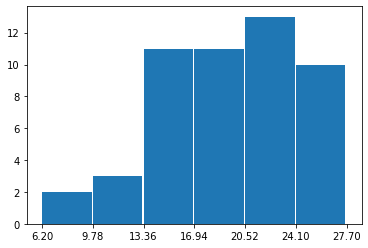

In [ ]:
hist_data = plt.hist(beton, bins=k, width=3.5, align='mid')
plt.xticks(list(left_bound) + [bmax], rotation=0)
print(hist_data)

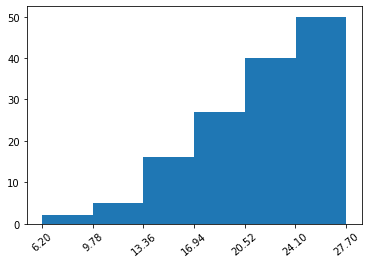

In [ ]:
plt.hist(beton, bins=k, cumulative=True)
plt.xticks(list(left_bound) + [bmax], rotation=40)
plt.show()

## Zadanie - statystyki: powtórzenie
Wczytać dane `basketball.csv` opisujące podstawowe charakterystyki koszykarzy:
- `height` - wzrost w stopach,
- `weight` - waga w funtach,
- `field_goals` - frakcja uzyskanych punktów w rzutach oddanych z pola,
- `free_throws` - frakcja uzyskanych punktów w rzutach wolnych,
- `avg_points` - średnia liczba punktów.

Skupić się na zmiennej `weight`.

a) Obliczyć podstawowe statystyki próbkowe

b) Sporządzić i opisać wykres skrzynkowy.

c) ***Zbudować szereg rozdzielczy.

d) Narysować histogram liczności.

e) Narysować histogram skumulowanych liczności.

In [2]:
bas = pd.read_csv('basketball.csv')
bas.head(5)

,height,weight,field_goals,free_throws,avg_points
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [4]:
w = bas.weight

In [7]:
#a
st = Stats(w)
print(f"Mean: {w.mean()}")
print(f"Median: {w.median()}")
print(f"Variance: {w.var()}")
print(f"Standard deviation: {w.std()}")
print(f"Count: {len(w)}")
print(f"Min: {w.min()}")
print(f"Max: {w.max()}")
print(f"Range: {w.max() - w.min()}")
print(f"Q1: {np.quantile(w, .25)}")
print(f"Q2: {np.quantile(w, .5)}")
print(f"Q3: {np.quantile(w, .75)}")
print(f"IQR: {np.quantile(w, .75) - np.quantile(w, .25)}")

Mean: 209.90740740740742
Median: 212.5
Variance: 915.9723969252269
Standard deviation: 30.26503588177663
Count: 54
Min: 105
Max: 263
Range: 158
Q1: 185.0
Q2: 212.5
Q3: 235.0
IQR: 50.0


In [9]:
#srednia windsorowska
np.mean(stats.mstats.winsorize(w, limits=[0.1, 0.1]))

211.55555555555554

In [13]:
#ucieta
stats.mstats.trimmed_mean(w, limits=(0.1, 0.1))

211.3409090909091

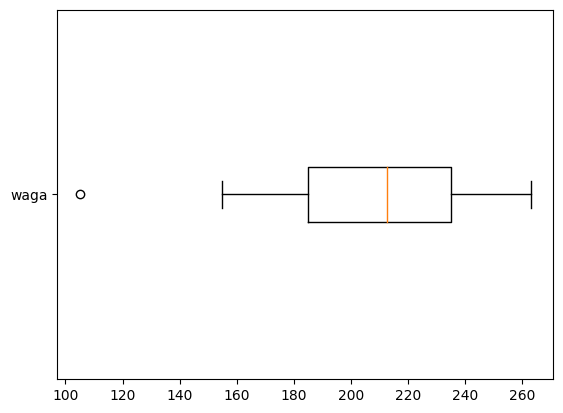

In [15]:
plt.boxplot(w, vert=False, meanline=True, labels=["waga"])
plt.show()

In [16]:
# c)
n = w.size

# wyznaczamy liczbę klas
left_k = 0.75 * np.sqrt(n)
right_k = np.sqrt(n)
print(left_k, right_k) # => k = 6

5.5113519212621505 7.3484692283495345


In [18]:
k = 6

# wyznaczamy długośc klasy
wmin = w.min()
wmax = w.max()

d = np.round((wmax - wmin) / k, 2)
print(d)

26.33


In [20]:
# wyznaczamy przedzialy klas
left_bound = np.round(np.arange(wmin, wmax, d)[:k], 2)

intervals = []
n_size = np.zeros(k)

# wyznaczamy szereg rozdzielczy
make_interval = lambda x, y: "[{}, {})".format(x, y)
make_closed_interval = lambda x, y: "[{}, {}]".format(x, y)

for i in range(k-1):
    l, r = left_bound[i], left_bound[i+1]
    intervals.append(make_interval(l, r))
    n_size[i] = np.sum((w >= l) & (w < r))

l, r = left_bound[k-1], wmax
intervals.append(make_closed_interval(l, r))
n_size[k-1] = np.sum((w >= l) & (w <= r))

f = n_size / w.size
frequency_distribution = pd.DataFrame({'Interval': np.array(intervals),
                                       'n': n_size, 'f': f,
                                      'cn': np.cumsum(n_size), 'cf': np.cumsum(f)})
frequency_distribution

,Interval,n,f,cn,cf
0,"[105.0, 131.33)",1.0,0.018519,1.0,0.018519
1,"[131.33, 157.66)",1.0,0.018519,2.0,0.037037
2,"[157.66, 183.99)",9.0,0.166667,11.0,0.203704
3,"[183.99, 210.32)",16.0,0.296296,27.0,0.500000
4,"[210.32, 236.65)",18.0,0.333333,45.0,0.833333
5,"[236.65, 263]",9.0,0.166667,54.0,1.000000


(array([ 1.,  1.,  9., 16., 18.,  9.]), array([105.        , 131.33333333, 157.66666667, 184.        ,
       210.33333333, 236.66666667, 263.        ]), <BarContainer object of 6 artists>)


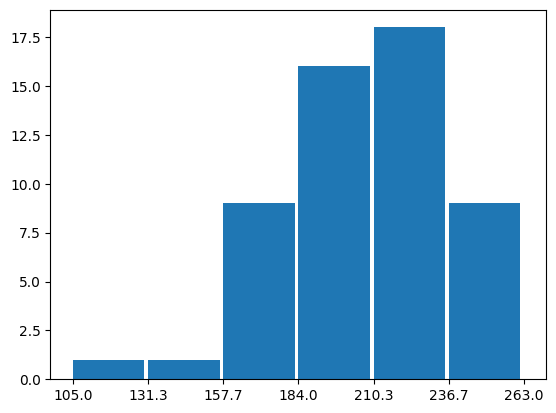

In [24]:
hist_data = plt.hist(w, bins=k, width=25, align='mid')
plt.xticks(list(left_bound) + [wmax], rotation=0)
print(hist_data)

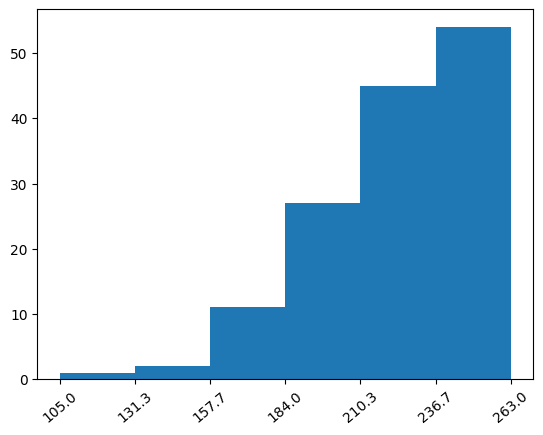

In [25]:
plt.hist(w, bins=k, cumulative=True)
plt.xticks(list(left_bound) + [wmax], rotation=40)
plt.show()

## Zadanie - porównanie średniej arytmetycznej i mediany
Wczytaj dane `stats1.csv` opisujące pomiar pewnej długości przez dwóch różnych ekspertów. Porównaj ich rozkład oraz statystyki próbkowe.

In [ ]:
stats1 = pd.read_csv('stats1.csv')
stats1.head(5)

,x,y
0,10.968388,10.481487
1,11.035494,13.211230
2,3.805479,3.954873
3,3.402634,5.367647
4,7.527793,7.234025


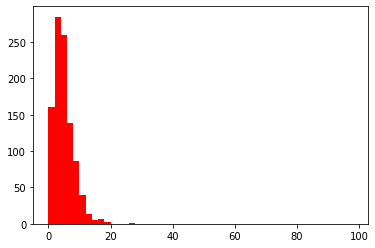

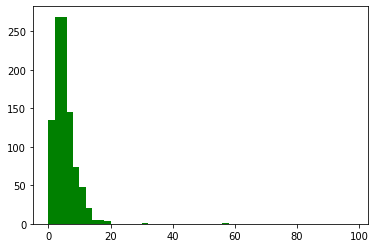

In [ ]:
#histogramy
plt.hist(stats1.x, bins=np.arange(0, 100, 2), color='r')
plt.show()

plt.hist(stats1.y, bins=np.arange(0, 100, 2), color='g')
plt.show()

In [ ]:
#podstawowe statystyki
pd.DataFrame({'x': stats1.x, 'y': stats1.y}).describe()

,x,y
count,1000.000000,1000.000000
mean,4.956962,6.523673
std,3.165879,28.577406
min,0.289994,-1.198420
25%,2.660315,2.736644
50%,4.414328,4.530463
75%,6.575814,6.822966
max,27.866537,808.876344


In [ ]:
#zdarzają sięoutliery
stats1.y[np.where(stats1.y > np.quantile(stats1.y, 0.99))[0]]

103     30.095229
158    808.876344
240     17.864930
323     18.376594
380     99.305207
467     56.603880
524     18.773622
592    214.653314
658     18.098880
699    329.789401
Name: y, dtype: float64

In [ ]:
#tu nie
stats1.x[np.where(stats1.x > np.quantile(stats1.x, 0.99))[0]]

103    27.866537
240    18.567657
323    18.175175
357    16.665207
428    16.983643
503    16.255930
524    17.507817
658    17.966354
687    16.704449
892    16.168756
Name: x, dtype: float64

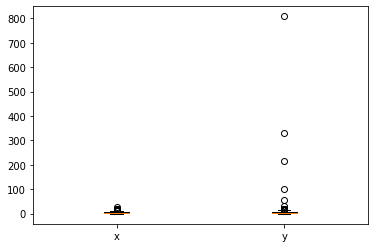

In [ ]:
#widać to a boxplocie
plt.boxplot([stats1.x, stats1.y], labels=['x', 'y'])
plt.show()

In [ ]:
stats1.x[np.where(stats1.x > 3 * np.std(stats1.x))[0]]

0      10.968388
1      11.035494
11      9.516011
12     10.238225
21     10.866259
         ...    
946    13.879620
952    12.253985
961     9.913486
968     9.862946
995    11.844055
Name: x, Length: 83, dtype: float64

In [ ]:
#outliery sprawiają, że odchyenie jest większe
stats1.y[np.where(stats1.y > 3 * np.std(stats1.y))[0]]

158    808.876344
380     99.305207
592    214.653314
699    329.789401
Name: y, dtype: float64

**Wnioski:**
- **średnia artymetyczna**:
    + bierze pod uwagę całą próbę
    - bardzo wrażliwa na wpływ obserwacji odstających, zwanych też outlierami - obserwacje odstające, to te wartości w próbie, które są bardzo małe albo bardzo duże w stosunku do ogółu obserwacji (najczęściej, choć nie zawsze, outliery są rezultatem błędów grubych, stąd też należy być bardzo ostrożnym przy wyciąganiu wniosków na podstawie próby zawierającej obserwacje odstające).
- **mediana**:
    + całkowicie odporna na wpływ obserwacji odstających, bowiem wyznaczana jest na podstawie środkowych wartości w próbie i ignoruje całkowicie wartości ekstremalne.

## Zadanie - współczynnik rozproszenia
Wczytaj dane `stats2.csv` zawierające pomiary wagi słoni i myszy w pewnym zoo (w gramach). Wyznacz statystyki próbkowe i oceń, która próbka, opisująca wagę słoni, czy opisująca wagę myszy, ma większe rozproszenie wartości.

In [ ]:
from scipy import stats

In [ ]:
weight = pd.read_csv('stats2.csv')
weight.head(5)

,elephant,mouse
0,3883240.0,21.0
1,4046450.0,18.0
2,4152119.0,22.0
3,2578306.0,23.0
4,3597481.0,25.0


In [ ]:
#podstawowe statystyki
s = weight.describe()
s

,elephant,mouse
count,1.000000e+02,100.000000
mean,4.017328e+06,20.470000
std,4.998078e+05,2.886594
min,2.578306e+06,13.000000
25%,3.685120e+06,19.000000
50%,4.046994e+06,20.000000
75%,4.380402e+06,22.000000
max,5.246947e+06,27.000000


In [ ]:
# odchylenie standardowe
weight.describe().loc['std']

elephant    499807.845364
mouse            2.886594
Name: std, dtype: float64

In [ ]:
# Rozstęp
weight.elephant.max() - weight.elephant.min(), weight.mouse.max() - weight.mouse.min()

(2668641.0, 14.0)

In [ ]:
# Rozstęp międzykwartylowy
stats.iqr(weight.elephant), stats.iqr(weight.mouse)

(695281.75, 3.0)

**Uwaga**: W sytuacji, gdy chcemy porównanć rozrzut dwóch lub więcej prób, nieraz wygodniej jest skorzystać ze względnej miary rozproszenia - **współczynnika rozproszenia**:
$$
V = \frac{S}{\overline{X}}\cdot 100\%.
$$


In [ ]:
#tą miarę warto stosować, bo słonie mają dużą wagę i naturalne jest to, że odchylenie będzie większe
#kiedy porównujemy wagę myszy odchylenie jest mniejsze. Ta miara pozwala nam porównać w sposób uczciwy odchylenie myszy i słoni
s.loc['std'] / s.loc['mean'] * 100

elephant    12.441300
mouse       14.101582
dtype: float64

## Miara korelacji — współczynnik korelacji Pearsona

W przypadku jednoczesnego badania dwóch cech pewnej populacji naszą próbą jest ciąg par $$(X_1, Y_1),\ldots,(X_n, Y_n),$$ gdzie $X_i$ oraz $Y_i$ oznaczają, odpowiednio, wartości pierwszej i drugiej cechy przyjmowane przez $i$-ty element próby.

Wówczas **współczynnik korelacji Pearsona** jest dany wzorem
\begin{equation*}
    r = \frac{\sum_{i=1}^n(X_i-\overline{X})(Y_i-\overline{Y})}{\sqrt{\sum_{i=1}^n(X_i-\overline{X})^2\sum_{i=1}^n(Y_i-\overline{Y})^2}}.
\end{equation*}

In [ ]:
?np.corrcoef

## Zadanie - korelacja liniowa
Wygeneruj próbkę $X$ z wybranego przez siebie rozkładu i oblicz wartość elementów próbki $Y$ zgodnie ze wzorem

a) $Y = X$,

b) $Y = 5X$,

c) $Y = -5X$,

d) $Y = X^2$,

f) $Y = \exp(X)$,

g) $Y = \sin(X)$,

a następnie oblicz współczynnik korelacji pomiędzy zmiennymi $X$ i $Y$.

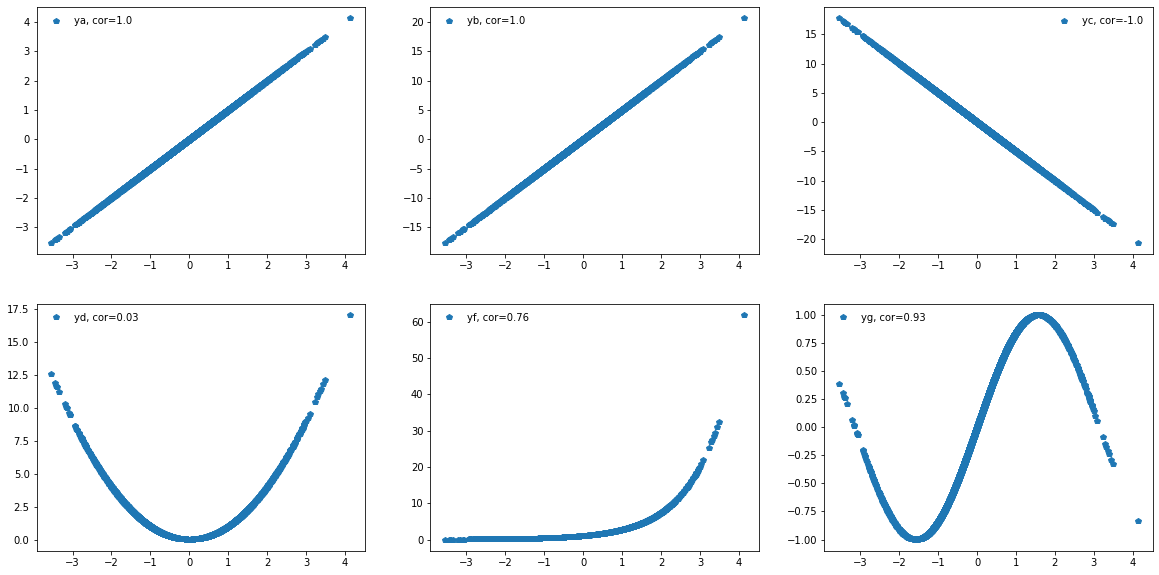

In [ ]:
f1 = lambda x: x
f2 = lambda a, x: a * x
f3 = lambda a, x: x ** a
f4 = lambda x: np.exp(x)
f5 = lambda x: np.sin(x)

x = stats.norm.rvs(size=10000, loc=0, scale=1)
ya = f1(x)
yb = f2(5, x)
yc = f2(-5, x)
yd = f3(2, x)
yf = f4(x)
yg = f5(x)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0, 0].plot(x, ya, "p", label="ya, cor={}".format(np.round(np.corrcoef(x, ya)[0, 1], 2)))
ax[0, 0].legend(loc='best', frameon=False)
ax[0, 1].plot(x, yb, "p", label="yb, cor={}".format(np.round(np.corrcoef(x, yb)[0, 1], 2)))
ax[0, 1].legend(loc='best', frameon=False)
ax[0, 2].plot(x, yc, "p", label="yc, cor={}".format(np.round(np.corrcoef(x, yc)[0, 1], 2)))
ax[0, 2].legend(loc='best', frameon=False)
ax[1, 0].plot(x, yd, "p", label="yd, cor={}".format(np.round(np.corrcoef(x, yd)[0, 1], 2)))
ax[1, 0].legend(loc='best', frameon=False)
ax[1, 1].plot(x, yf, "p", label="yf, cor={}".format(np.round(np.corrcoef(x, yf)[0, 1], 2)))
ax[1, 1].legend(loc='best', frameon=False)
ax[1, 2].plot(x, yg, "p", label="yg, cor={}".format(np.round(np.corrcoef(x, yg)[0, 1], 2)))
ax[1, 2].legend(loc='best', frameon=False)

**Wniosak**:
- zerowa korelacja nie oznacza braku zależności, np. związek $y=x^2$.

## Zadanie - korelacja liniowa
Wygeneruj $n$ par niezależnych zmiennych losowych, dla każdej z nich wyznacz współczynnik korelacji, a następnie sprawdź rozkład otrzymanych współczynników.

In [ ]:
#1000 razy liczymy na korelację na 100-elementowej próbce
n = 1000
n_sample = 100

cor = np.zeros(n)

for i in range(n):
    x = stats.norm.rvs(size=n_sample, loc=0, scale=1)
    y = stats.uniform.rvs(size=n_sample, loc = -2, scale=4)
    cor[i] = np.corrcoef(x, y)[0, 1]

In [ ]:
pd.DataFrame(cor).describe() #podstawowe statystyki wektora korelacji

,0
count,1000.000000
mean,-0.002581
std,0.104302
min,-0.310919
25%,-0.071950
50%,-0.001622
75%,0.064196
max,0.326600


**Wniosek**: Niezależne zmienne losowe moga mieć niezerową korelację pearsonowską.

## Zadanie - istotność korelacji
Wczytać dane `basketball.csv` opisujące podstawowe charakterystyki koszykarzy. Oblicz korelację pomiędzy zmienną `height` i `weight`. Za pomocą testu permutacyjnego sprawdź czy korelacja jest istotna.

In [114]:
bas = pd.read_csv('basketball.csv')

,height,weight,field_goals,free_throws,avg_points
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [100]:
w = bas.weight
h = bas.height

In [101]:
kor = np.corrcoef(w,h)[1,0]
kor

0.834324004575237

In [102]:
h = np.array(h)

In [106]:
korrs = np.repeat(0.0,100000)
for i in np.arange(0,100000):
  np.random.shuffle(h)
  korrs[i] = np.corrcoef(w,h)[1,0]

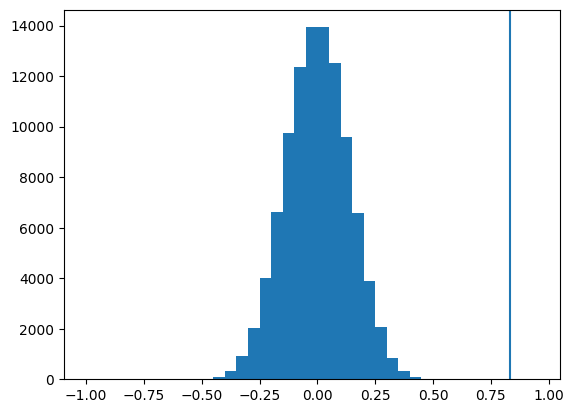

In [110]:
plt.hist(korrs,bins=np.arange(-1, 1, 0.05))
plt.axvline(kor)
plt.show()

In [112]:
p_val = (1+np.sum(np.abs(korrs)>np.abs(kor)))/(len(korrs)+1)
p_val

9.99990000099999e-06

In [138]:
h = bas.height
ft = np.array(bas.free_throws)

In [139]:
kor = np.corrcoef(h,ft)[1,0]
kor

-0.2592711607619672

In [140]:
korrs = np.repeat(0.0,100000)
for i in np.arange(0,100000):
  np.random.shuffle(ft)
  korrs[i] = np.corrcoef(h,ft)[1,0]

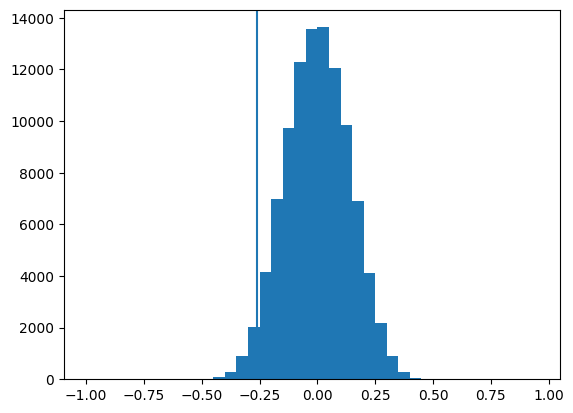

In [141]:
plt.hist(korrs,bins=np.arange(-1, 1, 0.05))
plt.axvline(kor)
plt.show()

In [142]:
p_val = (1+np.sum(np.abs(korrs)>np.abs(kor)))/(len(korrs)+1)
p_val

0.057069429305706944

## Zadanie
Wczytaj zbiór danych `boston_prediction.csv`, który zawiera dane z predykcji dwóch modeli cen mieszkań w Bostonie (więcej na temat zbioru, na podstawie, którego zbudowano modele możesz przeczytać, np. https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html).

Oceń jakość predykcji obu modeli: policz średnią, medianę, kwartyl rzędu 90% oraz odchylenie standardowe dla błędu bezwzględnego i względnego oraz korelację wartości przewidywanych z prawdziwymi. Wyciągnąć wnioski na temat działania obu modeli.

**Wskazówka**:

**Błąd bezwzględny** liczymy ze wzoru:
$$
\Delta x = |x-x_0|.
$$

**Błąd względny** liczymy ze wzoru:
$$
\delta = \frac{\Delta x}{x}.
$$

Oznaczenia: $x$ - wartość dokładna, $x_0$ - wartość zmierzona.

In [ ]:
#dane boston
# https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
#dane zawierające zmienną price i jego predykcję (przewidywania) zrobioną za pomocą dwóch modeli
boston_pred = pd.read_csv("boston_prediction.csv")
boston_pred.head(5)

,price,model_pred,model_pred2
0,24.0,30.0,27.4
1,21.6,25.0,21.7
2,34.7,30.6,33.7
3,33.4,28.6,33.7
4,36.2,27.9,33.7


In [ ]:
boston_pred.describe() #podstawowe statystyki

,price,model_pred,model_pred2
count,506.000000,506.000000,506.000000
mean,22.532806,22.532016,22.539921
std,9.197104,7.913610,8.258947
min,5.000000,-4.300000,12.000000
25%,17.025000,17.425000,17.100000
50%,21.200000,22.100000,21.700000
75%,25.000000,27.400000,27.400000
max,50.000000,44.700000,45.100000


In [ ]:
np.quantile(boston_pred, q=0.90, axis=0) #kwantyl na poziomie 0.9

array([34.8, 33.3, 33.7])

In [ ]:
# blad bezwzgledny

print("--- Model 1 - błąd bezwzględny ---")
print(pd.DataFrame(np.abs(boston_pred.price - boston_pred.model_pred)).describe())

print("--- Model 2 - błąd bezwzględny ---")
print(pd.DataFrame(np.abs(boston_pred.price - boston_pred.model_pred2)).describe())


--- Model 1 - błąd bezwzględny ---
                0
count  506.000000
mean     3.269565
std      3.349465
min      0.000000
25%      1.000000
50%      2.450000
75%      4.500000
max     26.200000
--- Model 2 - błąd bezwzględny ---
                0
count  506.000000
mean     2.909881
std      2.791767
min      0.000000
25%      1.100000
50%      2.300000
75%      3.700000
max     23.200000


In [ ]:
# blad wzgledny

print("--- Model 1 - błąd względny ---")
print(pd.DataFrame(np.abs(boston_pred.price - boston_pred.model_pred) / boston_pred.price).describe())

print("--- Model 2 - błąd względny ---")
print(pd.DataFrame(np.abs(boston_pred.price - boston_pred.model_pred2) / boston_pred.price).describe())

--- Model 1 - błąd względny ---
                0
count  506.000000
mean     0.164097
std      0.185470
min      0.000000
25%      0.046101
50%      0.114476
75%      0.215397
max      1.614286
--- Model 2 - błąd względny ---
                0
count  506.000000
mean     0.154650
std      0.193455
min      0.000000
25%      0.052651
50%      0.102473
75%      0.179003
max      1.533333


In [ ]:
# korelacja

print("--- Model 1 - korelacja ---")
print(np.corrcoef(boston_pred.price, boston_pred.model_pred)[0, 1])

print("--- Model 2 - korelacja ---")
print(np.corrcoef(boston_pred.price, boston_pred.model_pred2)[0, 1])

#model drugi jest ciut lepszy widać to na błędzie bezwzględnym i korelacja między prawdziwą zmienną price i przewidywaniem jest lepsza
#dla modelu drugiego

--- Model 1 - korelacja ---
0.8606612985241783
--- Model 2 - korelacja ---
0.8986422163603659
